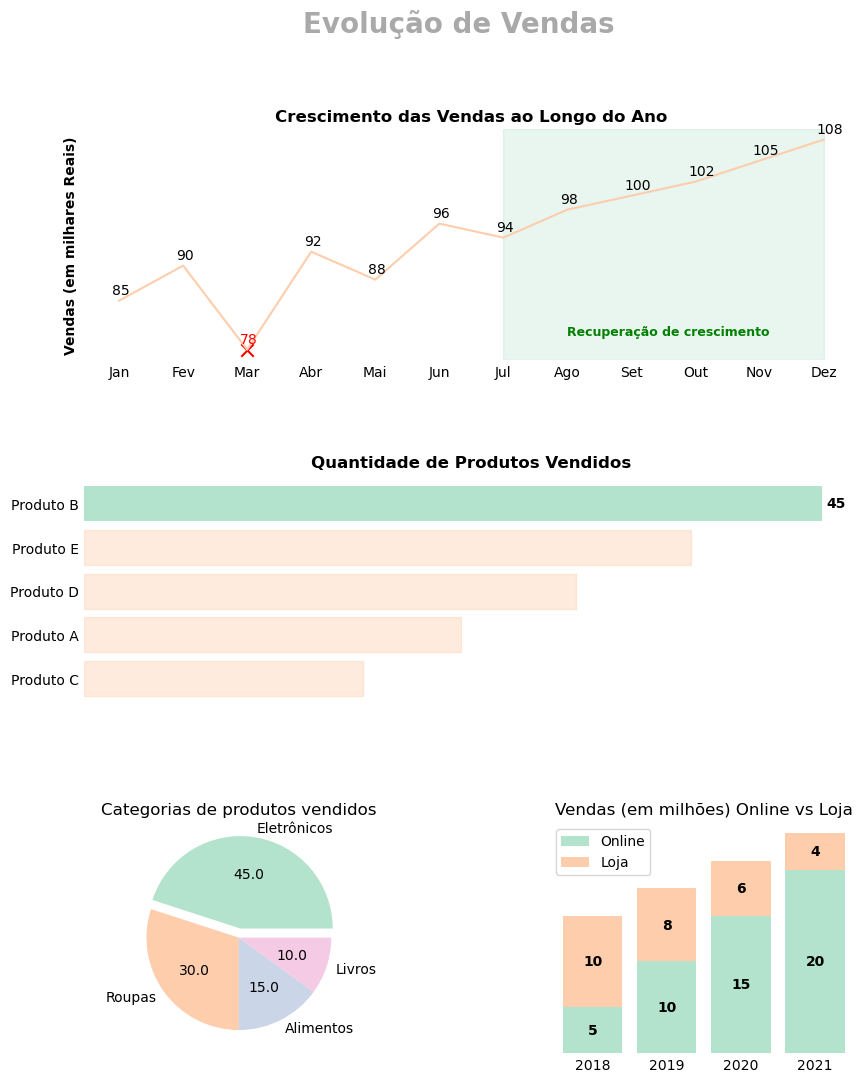

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

# criando nosso mosaico a orientação objeto

mosaico = 'AA;BB;CD'
espacamento = {'wspace': 0.5, 'hspace': 0.5}

fig = plt.figure(figsize = (10,12))
axs = fig.subplot_mosaic(mosaico, gridspec_kw= espacamento)

# alterando a paleta padrão do matplotlib

cores = plt.get_cmap("Pastel2").colors
ciclo_cores = cycler("color", cores)
plt.rc("axes", prop_cycle = ciclo_cores)

# Gráfico 1 - Linhas

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]


# usando o np where, crie uma lista de marcadores x para o valor mínimo e o para o resto
marcadores = np.where(vendas == np.min(vendas), 'x', '')

axs['A'].plot(meses, vendas, color = cores[1])

for posicao, marcador in enumerate(marcadores):
    if marcador == 'x':
        cor = 'red'
        tamanho = 80
    else:
        cor = 'black'
        tamanho = 0
    axs['A'].scatter(meses[posicao], vendas[posicao], marker=marcador, s=tamanho, color=cor)
    axs['A'].annotate(vendas[posicao], color= cor , xy=(meses[posicao], vendas[posicao]), xytext=(-5,5), textcoords= 'offset points')

# destacando uma região
axs['A'].axvspan(6,11, alpha = 0.3, color = cores[0])
axs['A'].text(7,80, 'Recuperação de crescimento', color = 'green', fontweight = 'bold', fontsize = 9)

axs['A'].set_frame_on(False)
axs['A'].tick_params(axis = 'x', length = 0)
axs['A'].set_yticks([])
axs['A'].set_ylabel('Vendas (em milhares Reais)', fontweight = 'bold')
axs['A'].set_title('Crescimento das Vendas ao Longo do Ano', fontweight = 'bold')

# gráfico 2 - barras horizontais

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]

dados_ordenados = sorted(zip(quantidades, produtos))  # por quantidade
quantidades_ordenadas = [x[0] for x in dados_ordenados]
produtos_ordenados = [x[1] for x in dados_ordenados]

barras = axs['B'].barh(produtos_ordenados, quantidades_ordenadas)

axs['B'].bar_label(barras, labels= [max(quantidades_ordenadas) if x == max(quantidades_ordenadas) else '' for x in quantidades_ordenadas],
              padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
axs['B'].set_frame_on(False)

# retirando o eixo x
axs['B'].set_xticks([])
axs['B'].tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[1])
        barras[i].set_alpha(0.4)
        
axs['B'].set_title('Quantidade de Produtos Vendidos', fontweight = 'bold')

# plt.gca().invert_yaxis()

# gráfico 3 - pizza

categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.1, 0, 0, 0]  # destacar a primeira fatia

axs['C'].pie(quantidades, labels=categorias, explode = destaque, autopct='%.1f')
axs['C'].set_title('Categorias de produtos vendidos')

# gráfico 4 -  barras empilhadas 

anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]
 
barras_online = axs['D'].bar(anos, vendas_online, label='Online')
barras_loja = axs['D'].bar(anos, vendas_loja, bottom=vendas_online, label='Loja')

axs['D'].bar_label(barras_online, labels= vendas_online, label_type= 'center', fontweight = 'bold')
axs['D'].bar_label(barras_loja, labels= vendas_loja, label_type= 'center', fontweight = 'bold')

axs['D'].set_xticks(ticks=anos)

axs['D'].set_frame_on(False)

axs['D'].set_yticks([])
axs['D'].tick_params(axis = 'x', length = 0)
axs['D'].set_title('Vendas (em milhões) Online vs Loja')
axs['D'].legend()

fig.suptitle('Evolução de Vendas', fontsize = 20, color = 'Darkgray', fontweight = 'bold')

plt.show()